In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re # regular expression 
import tweepy #access to tweet app
from tweepy import OAuthHandler #authenication 
from textblob import TextBlob #text/tweet parse

## Twitter API dealing class

In [2]:
class TwitterClient(object):
    # Connecting to Twitter API
    def __init__(self):  
        # keys and tokens from the Twitter Dev Console
        consumer_key = 'TL7RyLnfilYH6xaoAlS0XFDCg'
        consumer_secret = 'u5uBn4P62PMIxT4uwUVTl1Ycx4rsfByFs6jl2e4SQ9zDjPIzCO'
        access_token = '919434545924935681-2woCDEXuXQdhJewDaCRBqHBYmi5SFDN'
        access_token_secret = 'T29jqUm6rZqsRYO7AGc47GlgYTaAaN5OtJD0DATo1uBjh'
 
        # attempt authentication
        try:
            # create OAuthHandler object
            self.auth = OAuthHandler(consumer_key, consumer_secret)
            # set access token and secret
            self.auth.set_access_token(access_token, access_token_secret)
            # create tweepy API object to fetch tweets
            self.api = tweepy.API(self.auth)
            print('auth. success')
            
            
        except:
            print("Error: Authentication Failed")
 
    def clean_tweet(self, tweet):
        # Utility function to clean tweet text by removing links, special characters using simple regex statements.
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())
    
 
    def get_tweet_sentiment(self, tweet):
        # Utility function to classify sentiment of passed tweet using textblob's sentiment method
        # create TextBlob object of passed tweet text
        analysis = TextBlob(self.clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
 
    def get_tweets(self, query, count=10):
        # Main function to fetch tweets and parse them.
        # empty list to store parsed tweets
        tweets = []
 
        try:
            # call twitter api to fetch tweets
            fetched_tweets = self.api.search(q = query, count = count)
 
            # parsing tweets one by one
            for tweet in fetched_tweets:
                # empty dictionary to store required params of a tweet
                parsed_tweet = {}
 
                # saving text of tweet
                parsed_tweet['text'] = tweet.text
                # saving sentiment of tweet
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)
 
                # appending parsed tweet to tweets list
                if tweet.retweet_count > 0:
                    # if tweet has retweets, ensure that it is appended only once
                    if parsed_tweet not in tweets:
                        tweets.append(parsed_tweet)
                else:
                    tweets.append(parsed_tweet)
 
            # return parsed tweets
            return tweets
 
        except tweepy.TweepError as e:
            # print error (if any)
            print("Error : " + str(e))

## Applying Sentimental Analysis

In [3]:
def get_tweet_result(leader):    
    print(leader)
     # creating object of TwitterClient Class
    api = TwitterClient()
    # calling function to get tweets
    tweets = api.get_tweets(query = leader, count = 200) #no. of tweets
    print(tweets)
    
    # picking positive tweets from tweets
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
    
    result=[];                           
    # percentage of positive tweets
    print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
    result.append(format(100*len(ptweets)/len(tweets)))
    
    # picking negative tweets from tweets
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
    # percentage of negative tweets
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
    result.append(format(100*len(ntweets)/len(tweets)))
    # percentage of neutral tweets
    print("Neutral tweets percentage: {} %".format(100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets)))
    result.append(format(100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets)))

    return result

### List of leaders

In [4]:
leaders=['Narendra Modi','Rahul Gandhi','Arvind Kejriwal', 'Amit Shah']
#Can pass name of any leader as you wish by just appending leader name string 
#Can also pass any name which has twitter account

## Fetching Tweet of each leaders

In [5]:
def gettweet():
    res=[]
    # calling main function
    for l in leaders:
        res.append(get_tweet_result(l))        
    print(res)
    return res

In [6]:
res = gettweet()
print(res)

Narendra Modi
auth. success
[{'text': 'RT @AshishJaggi_1: PM Narendra Modi is not only a role model but a father figure and a friend at the sametime   \n\nHis popularity makes him…', 'sentiment': 'neutral'}, {'text': 'RT @impankajmani: PM chairs a meeting to review preparations for the Olympics\nhttps://t.co/gRzgsdtdbO\nvia NaMo App', 'sentiment': 'neutral'}, {'text': 'Title : अमेरिकी उप-राष्ट्रपति कमला हैरिस ने पीएम मोदी से फोन पर की बात, इन मुद्दों पर हुई बात\nLink :… https://t.co/Vn6L9RTPWl', 'sentiment': 'neutral'}, {'text': "RT @PaliwalAvi: I have much to say about change &amp; continuity in India's foreign policies pre &amp; post 2014. But, for now, I am just digesting…", 'sentiment': 'positive'}, {'text': "RT @KrisNair1: If Rahul Gandhi can do Press Conference then why can't Narendra Modi afterall he is our Prime Minister\n\nIs he afraid ?", 'sentiment': 'negative'}, {'text': 'RT @iAnkurSingh: -Punjab purchased Covaxin @ Rs 400\n-Sold it to Pvt Hospital @ Rs 1060\n-Pvt Hospital 

[{'text': 'RT @OpIndia_com: Congress leaders ate biscuits from same plate as Rahul Gandhi’s pet dog’: Assam CM thanks RaGa while recollecting that ‘fa…', 'sentiment': 'positive'}, {'text': "RT @indian_armada: Smriti Irani waiting for Rahul Gandhi's reply on her tweets 🥴 https://t.co/McUk3QVX0O", 'sentiment': 'neutral'}, {'text': 'RT @ek_aalu_bonda: "I\'m grateful to Mr. Rahul gandhi; agar vo famous meeting na hoti toh aaj mai assam ka CM na hota" ~ @himantabiswa https…', 'sentiment': 'positive'}, {'text': 'RT @SaffronSangh: हिमंत बिस्व सरमा बोले- राहुल गांधी का अहसानमंद हूं, पिदी के साथ मीटिंग न होती तो मैं असम का CM न होता !\n\n https://t.co/Di…', 'sentiment': 'neutral'}, {'text': "RT @KrisNair1: If Rahul Gandhi can do Press Conference then why can't Narendra Modi afterall he is our Prime Minister\n\nIs he afraid ?", 'sentiment': 'negative'}, {'text': 'RT @srinivasiyc: First, GOI always abuse Rahul Gandhi,\nThen GOI do exactly what he suggests \n\nनही संभल रहा तो कुर्सी से उतर जाओ 🙏',

[{'text': 'RT @Nher_who: Today Amit Shah said that India Under PM Modi has successfully fought COVID19 Battle\n\nA floating body in the Ganga agrees', 'sentiment': 'positive'}, {'text': 'RT @s_shreyatweets: #अबकी_बार_करोड़ो_बेरोजगार\n\nDelhi HC told off to Central Govt , Go BEG &amp; STEAL oxygen.\n\nFirst time in mankind a judiciar…', 'sentiment': 'positive'}, {'text': 'RT @IndiaTVHindi: शाह ने कहा, मोदी सरकार ने कोरोना की दूसरी लहर को काफी कम समय में किया कंट्रोल\nhttps://t.co/nuJYTT3OBG', 'sentiment': 'neutral'}, {'text': "RT @gautmaxx: Respected Amit Shah Sir said that India successfully fought COVID-19 under Respected Shri Narendra Modi Sir Ji's governance.…", 'sentiment': 'positive'}, {'text': 'RT @VeeryaSorry: Amit Shah said, "India Under Modi has successfully fought COVID Battle".\n\nFor some people \'Lost Lives\' means success.', 'sentiment': 'positive'}, {'text': 'RT @PunnyBhaiya: India Under PM Modi has successfully fought COVID19 Battle: Amit Shah\n\nThis is successful acco

## Ploting Twitter Sentimental Analysis

In [7]:
positive=[]
negative=[]
neutral=[]

for i in range(0,len(res)):
    positive.append(res[i][0])
    negative.append(res[i][1])
    neutral.append(res[i][2])

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

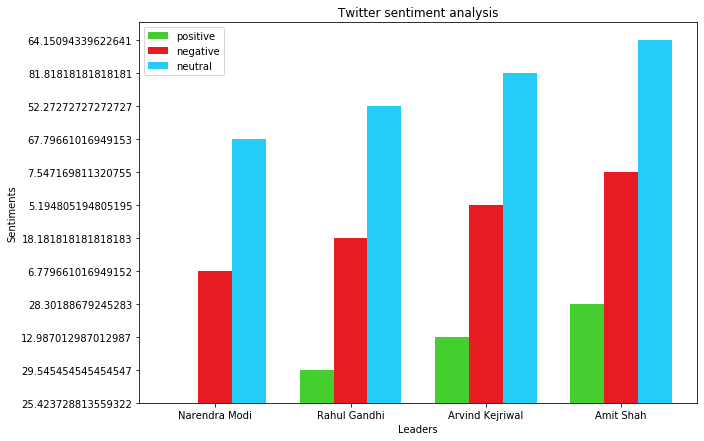

In [9]:
n_groups = len(leaders)   # No. of leaders 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = (1/n_groups)
opacity = 1
 
rects1 = plt.bar(index, positive, bar_width,
                 alpha=opacity,
                 color='#45CE30',
                 label='positive')
 
rects2 = plt.bar(index + bar_width, negative, bar_width,
                 alpha=opacity,
                 color='#E71C23',
                 label='negative')

rects3 = plt.bar(index + bar_width+ bar_width, neutral, bar_width,
                 alpha=opacity,
                 color='#25CCF7',
                 label='neutral')


plt.xlabel('Leaders')
plt.ylabel('Sentiments')
plt.title('Twitter sentiment analysis')
plt.xticks(index + bar_width, leaders)
plt.legend()
plt.show()